# sklearn中提供了三种API评估接口

https://scikit-learn.org/stable/modules/model_evaluation.html#model-evaluation

### Estimator score method
### Scoring parameter
### metrics fucntion

# 评估方法 --metrics fucntion

## 评估方法的原理
准确率、精确率（查准率）、召回率（查全率）、F1值、ROC曲线的AUC值，都可以作为评价一个机器学习模型好坏的指标（evaluation metrics），而这些评价指标直接或间接都与混淆矩阵有关，前四者可以从混淆矩阵中直接计算得到，AUC值则要通过ROC曲线进行计算，而ROC曲线的横纵坐标又和混淆矩阵联系密切，所以在了解这些评价指标之前，要先了解什么是混淆矩阵！

## 混淆矩阵
对于二分类问题
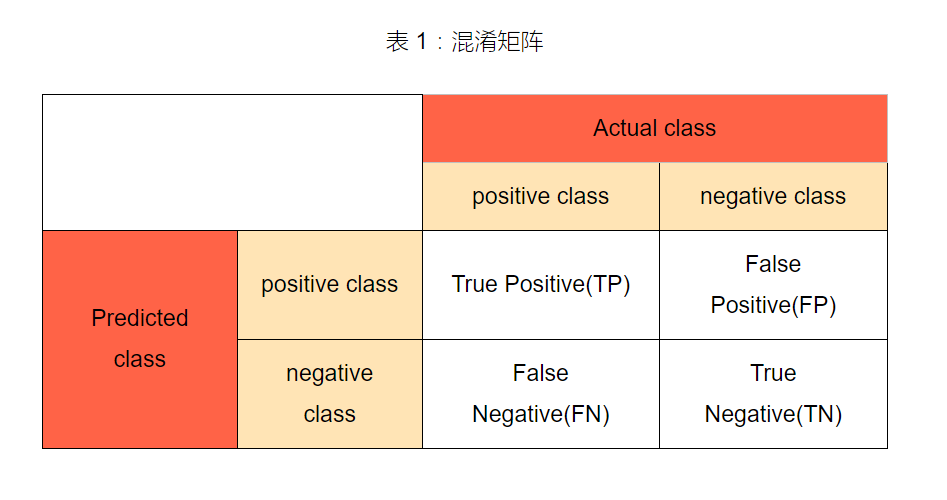

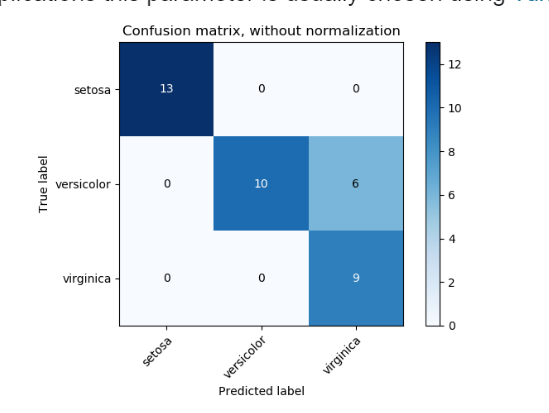

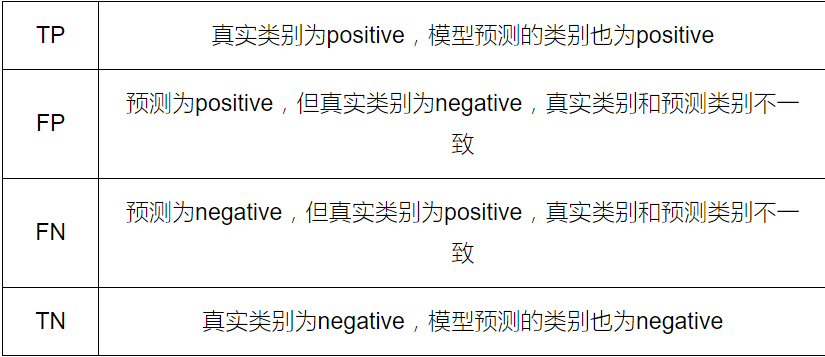

TP、FP、TN、FN，第一个字母表示样本的预测类别与真实类别是否一致，第二个字母表示样本被预测的类别。

## 准确率
也就是model.score以及metrics.accuracy_score()
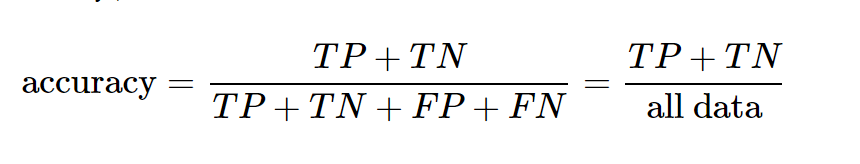

In [2]:
##在sklearn中调用的用法是：##这是分类的评价指标
from sklearn.metrics import accuracy_score
"""
模型的训练
模型预测
"""
accuracy_score(y_true, y_pred, normalize=True, sample_weight=None)#真实值，预测值

NameError: name 'y_true' is not defined

## 精确率（查准率）和召回率（查全率）

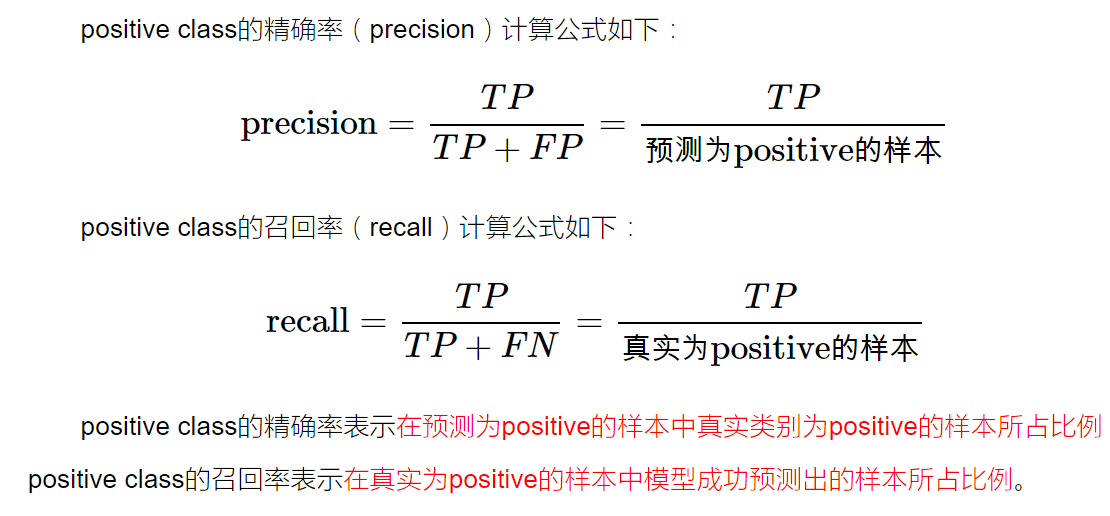

In [4]:
## sklearn中调用的方法
from sklearn.metrics import precision_score,recall_score#分别为精确率和召回率
"""
模型的训练
模型预测
"""
precision_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
recall_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)

TypeError: precision_score() missing 2 required positional arguments: 'y_true' and 'y_pred'

positive class的召回率只和真实为positive的样本相关，与真实为negative的样本无关；而精确率则受到两类样本的影响。

 

## F1值和Fβ值

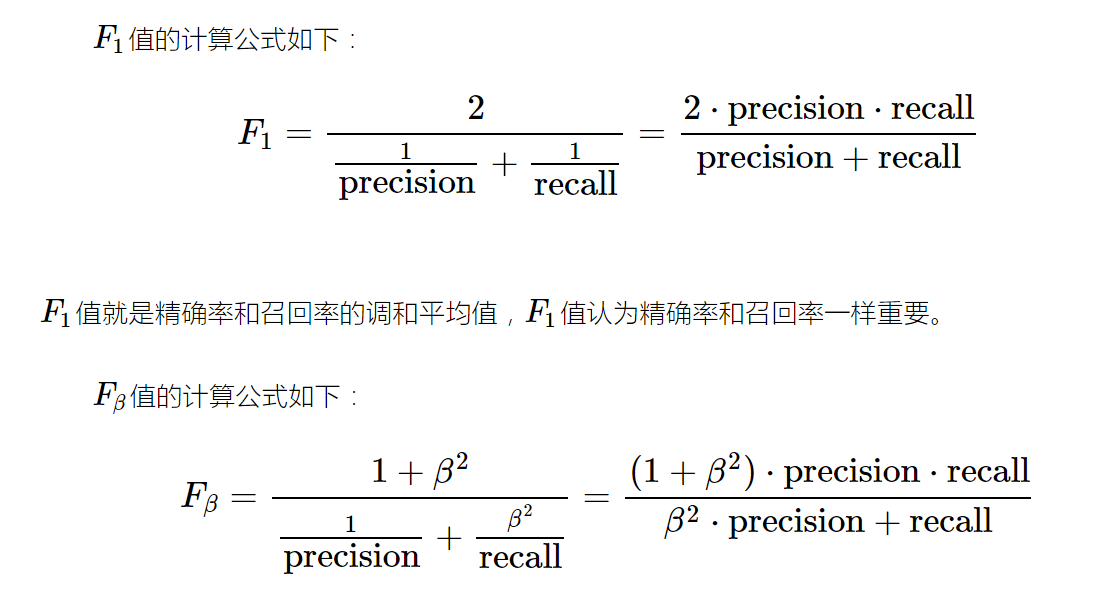

在β=1时，Fβ就是F1值，此时Fβ认为精确率和召回率一样重要；当β>1时，Fβ认为召回率更重要；当0<β<1时，Fβ认为精确率更重要。除了F1值之外，常用的还有F2和F0.5。

In [5]:
##sklearn中调用方法
from sklearn.metrics import f1_score,fbeta_score,
"""
模型的训练
模型预测
"""
f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
fbeta_score(y_true, y_pred, beta, labels=None, pos_label=1, average='binary', sample_weight=None)

<function sklearn.metrics.classification.f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)>

## ROC曲线及其AUC值

AUC全称为Area Under Curve，表示一条曲线下面的面积，ROC曲线的AUC值可以用来对模型进行评价
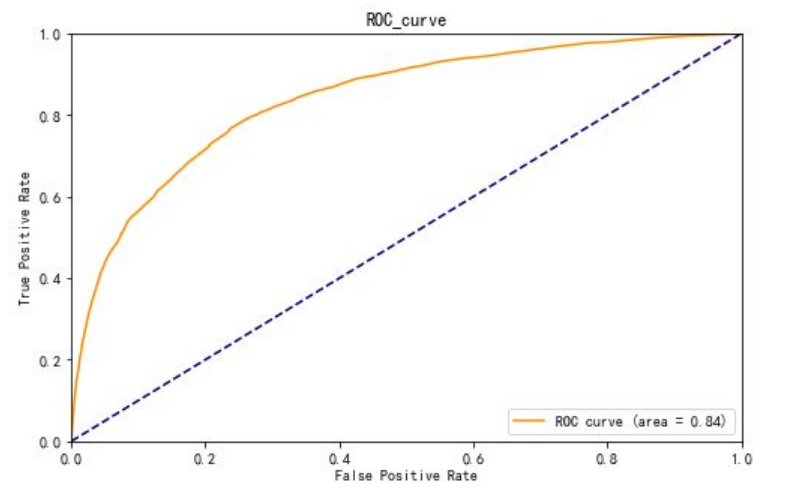

ROC曲线的纵坐标True Positive Rate（TPR）在数值上就等于positive class的recall，记作recallpositive，横坐标False Positive Rate（FPR）在数值上等于(1 - negative class的recall)，记作(1 - recallnegative)

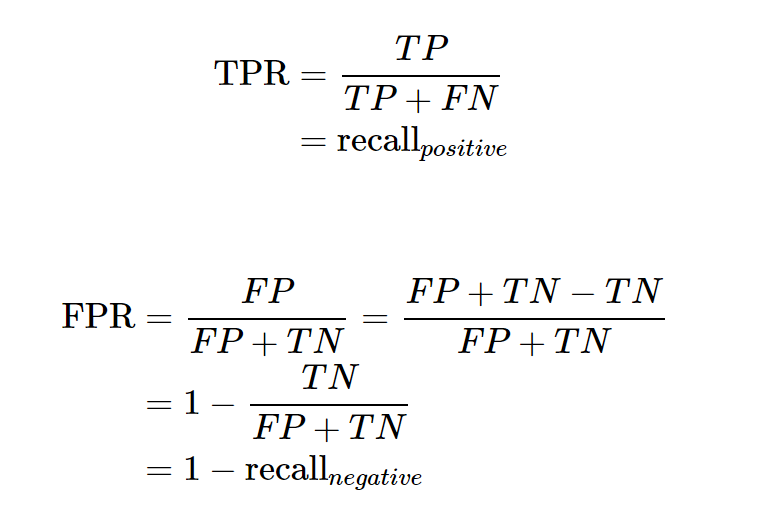

通过对分类阈值θ（默认0.5）从大到小或者从小到大依次取值，我们可以得到很多组TPR和FPR的值，将其在图像中依次画出就可以得到一条ROC曲线，阈值θ取值范围为[0,1]。

　　ROC曲线在图像上越接近左上角(0,1)模型越好，即ROC曲线下面与横轴和直线FPR = 1围成的面积（AUC值）越大越好。直观上理解，纵坐标TPR就是recallpositive值，横坐标FPR就是(1 - recallnegative)，前者越大越好，后者整体越小越好，在图像上表示就是曲线越接近左上角(0,1)坐标越好。

　　图展示了一个模型的ROC曲线，AUC值由定义通过计算ROC曲线、横轴和直线FPR = 1三者围成的面积即可得到。

In [1]:
## sklearn调用方法
from sklearn.metrics import roc_auc_score,roc_curve,auc
"""
模型的训练
模型预测
"""
roc_auc_score(y_true, y_score, average='macro', sample_weight=None)##y_score(进行一个model.score())
roc_curve(y_true, y_score, pos_label=None, sample_weight=None, drop_intermediate=True)
auc(x, y, reorder=False)

NameError: name 'y_true' is not defined

## Estimator score method

model.score()

## Defining your scoring strategy from metric functions¶

In [2]:
from sklearn.metrics import fbeta_score, make_scorer
ftwo_scorer = make_scorer(fbeta_score, beta=2)#score_func评分函数